📂 Please select your CSV file (e.g., drug_interactions_balanced.csv)...


Saving drug_interaction2.csv to drug_interaction2.csv
✅ First 5 rows of dataset:
         Drug1        Drug2           Interaction Severity  \
0  Paracetamol    Ibuprofen  No major interaction      Low   
1    Vitamin C  Paracetamol  No major interaction      Low   
2   Ranitidine  Paracetamol  No major interaction      Low   
3   Metoprolol    Vitamin D  No major interaction      Low   
4   Folic Acid         Iron  No major interaction      Low   

                            Note  
0            Safe in most cases.  
1                Generally safe.  
2                 No known risk.  
3  Safe when used as prescribed.  
4        Commonly used together.  

📊 Severity distribution:
Severity
High        10
Low          5
Moderate     5
Name: count, dtype: int64


/tmp/ipython-input-550108896.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Severity", data=df, palette="Set2")


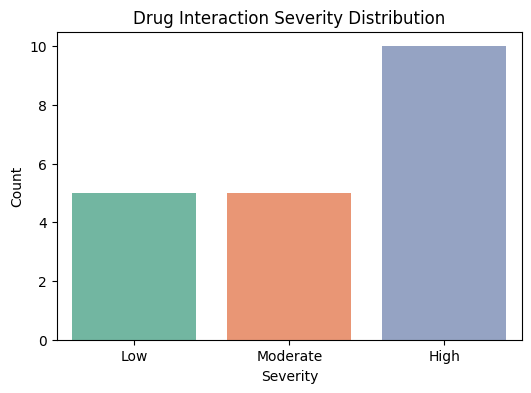


🔍 Missing values check:
Drug1          0
Drug2          0
Interaction    0
Severity       0
Note           0
dtype: int64
Training set: 12
Validation set: 4
Test set: 4

🔹 Logistic Regression Validation Report:
              precision    recall  f1-score   support

        High       0.67      1.00      0.80         2
         Low       1.00      1.00      1.00         1
    Moderate       0.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.56      0.67      0.60         4
weighted avg       0.58      0.75      0.65         4


🔹 Decision Tree Validation Report:
              precision    recall  f1-score   support

        High       0.50      0.50      0.50         2
         Low       1.00      1.00      1.00         1
    Moderate       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.50      0.50      0.50         4
weighted avg       0.50      0.50      0.50  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


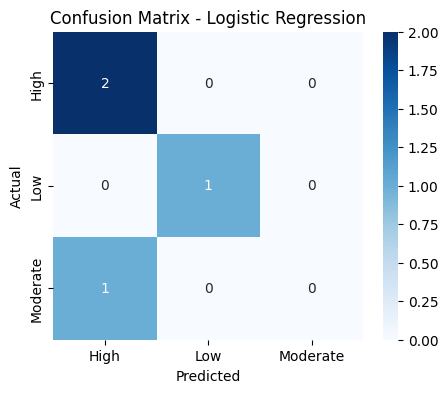

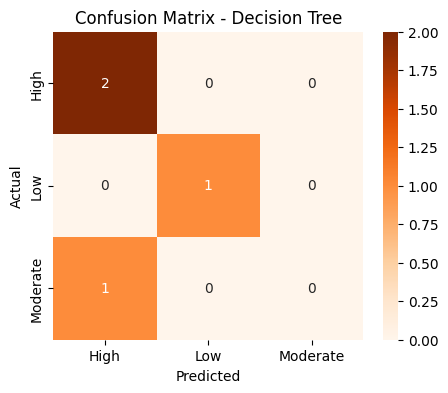

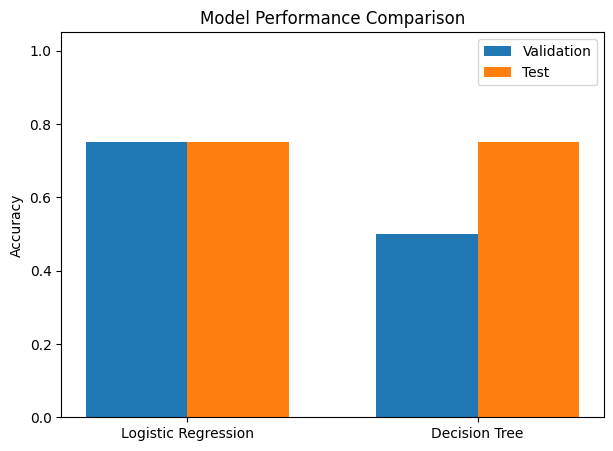


Predicted Severity for Warfarin + Aspirin: High


In [ ]:
# ==============================
# Drug Interaction Severity Prediction
# ==============================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files  # for manual upload
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ==============================
# Step 2: Upload & Load dataset
# ==============================
print("📂 Please select your CSV file (e.g., drug_interactions_balanced.csv)...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("✅ First 5 rows of dataset:")
print(df.head())

# ==============================
# Step 3: Data cleaning
# ==============================
df = df.drop_duplicates()
df["Drug1"] = df["Drug1"].str.strip().str.title()
df["Drug2"] = df["Drug2"].str.strip().str.title()
df["Severity"] = df["Severity"].str.strip().str.capitalize()

# ==============================
# Step 4: EDA + Visualization
# ==============================
print("\n📊 Severity distribution:")
print(df["Severity"].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x="Severity", data=df, palette="Set2")
plt.title("Drug Interaction Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()

print("\n🔍 Missing values check:")
print(df.isnull().sum())

# ==============================
# Step 5: Prepare features & labels
# ==============================
df["text"] = df["Drug1"] + " " + df["Drug2"] + " " + df["Interaction"]
label_encoder = LabelEncoder()
df["Severity_Label"] = label_encoder.fit_transform(df["Severity"])

X = df["text"]
y = df["Severity_Label"]

# ==============================
# Step 6: Train / Validation / Test split
# ==============================
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Training set: {len(X_train)}")
print(f"Validation set: {len(X_val)}")
print(f"Test set: {len(X_test)}")

# ==============================
# Step 7: Text vectorization
# ==============================
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(X_test)

# ==============================
# Step 8: Train models
# ==============================
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_vec, y_train)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_vec, y_train)

# ==============================
# Step 9: Validation metrics
# ==============================
val_pred_log = log_model.predict(X_val_vec)
val_pred_tree = tree_model.predict(X_val_vec)

log_reg_val_acc = accuracy_score(y_val, val_pred_log)
tree_val_acc = accuracy_score(y_val, val_pred_tree)

print("\n🔹 Logistic Regression Validation Report:")
print(classification_report(y_val, val_pred_log, target_names=label_encoder.classes_))

print("\n🔹 Decision Tree Validation Report:")
print(classification_report(y_val, val_pred_tree, target_names=label_encoder.classes_))

# ==============================
# Step 10: Test metrics + Confusion Matrices
# ==============================
test_pred_log = log_model.predict(X_test_vec)
test_pred_tree = tree_model.predict(X_test_vec)

log_reg_test_acc = accuracy_score(y_test, test_pred_log)
tree_test_acc = accuracy_score(y_test, test_pred_tree)

print("\n✅ Final Test Accuracy:")
print(f"Logistic Regression: {log_reg_test_acc:.2f}")
print(f"Decision Tree: {tree_test_acc:.2f}")

# Confusion Matrix - Logistic Regression
cm_log = confusion_matrix(y_test, test_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix - Decision Tree
cm_tree = confusion_matrix(y_test, test_pred_tree)
plt.figure(figsize=(5,4))
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Oranges", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ==============================
# Step 11: Model comparison plot
# ==============================
results = {
    "Logistic Regression": {"val_accuracy": log_reg_val_acc, "test_accuracy": log_reg_test_acc},
    "Decision Tree": {"val_accuracy": tree_val_acc, "test_accuracy": tree_test_acc}
}

model_names = list(results.keys())
val_acc = [results[m]["val_accuracy"] for m in model_names]
test_acc = [results[m]["test_accuracy"] for m in model_names]

x = range(len(model_names))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar([i - width/2 for i in x], val_acc, width=width, label="Validation")
plt.bar([i + width/2 for i in x], test_acc, width=width, label="Test")

plt.xticks(x, model_names)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.legend()
plt.ylim(0, 1.05)
plt.show()

# ==============================
# Step 12: Interactive Demo Prediction
# ==============================
def predict_severity(drug1, drug2, interaction_text, model=log_model):
    combined_text = f"{drug1} {drug2} {interaction_text}"
    vec = vectorizer.transform([combined_text])
    pred_label = model.predict(vec)
    return label_encoder.inverse_transform(pred_label)[0]

# Example
drug1_input = "Warfarin"
drug2_input = "Aspirin"
interaction_input = "May increase bleeding risk"

predicted = predict_severity(drug1_input, drug2_input, interaction_input)
print(f"\nPredicted Severity for {drug1_input} + {drug2_input}: {predicted}")
